# Propensity Model

Predicting the customer churn

## Tasks Done : 

1. Perform a descriptive analysis and visual exploration of key data elements (provide the code and output) and shortly report the (significance) of findings in plain language. 

**Answers** : A ...... company is losing more than 688 million dollors in lost sales due to customer churn, based on our current churn rate and the number of  customers for 20xx quarter X.

The current churn rate stands at almost 7% of the total customers.

As for the  company customer demographics, company customers are mostly young gender
a. They are 35 years old on average and  spend about 100 dollor per month.
As for the network usage profile, company customers prefer data and use then on average  of 12,620( kb/KB/MB : unit TBD later based on avg canadian data consumption) and spend about 1.6 mins on international calls.


As for the analysis os  strong indicator of churn, there currently seems to be no factor that   can strongly  explain the churn.

MobileSyrup

2. Build a simple model (decision tree or regression).

3. Evaluate its performance and report findings. If you have previous experience on lift analysis, please perform a lift analysis on test data.

4. Perform data cleansing, transformation, imputation on the data (do not exclude records with NA rather treat them).

5. Build second version of the model using advanced machine learning algorithms (random forest, neural network, deep learning, etc.) and evaluate it to compare the performance gain.

6. Based on available time, prioritize which steps would you further take to best optimize your model and then perform few of the most important steps to optimize the model. If you do not have sufficient time to cover this step, please provide a note on which steps would you take and why, what method would you use for performing the task, and what is your expected outcome after performing those steps.

7. Prepare 2 slides to communicate the results to business.

## 1.0 Data Load


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
churn = pd.read_csv("company_churn_data.csv")

# column name fixes
churn.columns = churn.columns.str.lower().str.strip()

## 2.0 Exploratory Analysis

#### 2.1 Descriptive analysis and visual exploration
Perform a descriptive analysis and visual exploration of key data elements (provide the code and output) and shortly report the (significance) of findings in plain language. 

#### 2.2 Report finding in plain language
        company is losing more than 688 million dollors in lost sales due to customer churn, based on our current churn rate and the number of  customers for 20xx quarter X by mobilesyrup.
        The current churn rate stands at almost 7% of the total customers.
        As for the  company customer demographics, company customers are mostly young gender-1. They are 35 yearsold on average and  spend about 100 dollor per month.
        As for the network usage profile, company customers prefer data and use then on average  of 12,620( kb/KB/MB : unit TBD later based on avg canadian data consumption) and spend about 1.6 mins on international calls.
       As for the analysis os  strong indicator of churn, there currently seems to be no factor that   can strongly  explain the churn.       
        Other Data PreProcessing Findings:
         (to be used in later Data PreProcessing stage)
        
        a. Irrelevant features - 'CusCare_flag' - Visual Plot
        b. Invalid Data : Negative Numerical features 
            i.  delayed_partial_payments_last6mth
            ii. delayed_partial_payments
        c. Outliers Present
        d. Scaling Required

### 2.2.1 Customer Churn Percentage


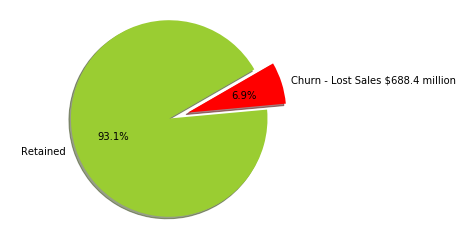

In [3]:
est_total_company_cust_q4_2017 = 8900000
est_total_lost_cust_via_churn_at_cur_rate = 0.069 * est_total_company_cust_q4_2017
est_yearly_lost_sales_via_churn = churn['mean_mthly_paid'].mean() *12 * \
                est_total_lost_cust_via_churn_at_cur_rate

#* churn[churn['churnid']==1].shape[0]

est_yearly_lost_sales_via_churn  = (est_yearly_lost_sales_via_churn / 1000000).round(1)
customer_sales_lost_lbl = 'Churn - Lost Sales $'+str(est_yearly_lost_sales_via_churn) +' million'

labels =  'Retained', customer_sales_lost_lbl
sizes = np.bincount(churn['churnid'])
colors = [ 'yellowgreen' , 'red']
explode = (0.2, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=30)
 
plt.axis('equal')
plt.show()

### 2.2.2 Average Payment Analysis

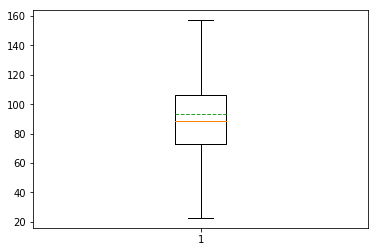

In [4]:
plt.boxplot(x = "mean_mthly_paid", data = churn , showfliers=False, 
           showmeans = True, meanline = True)
plt.show()

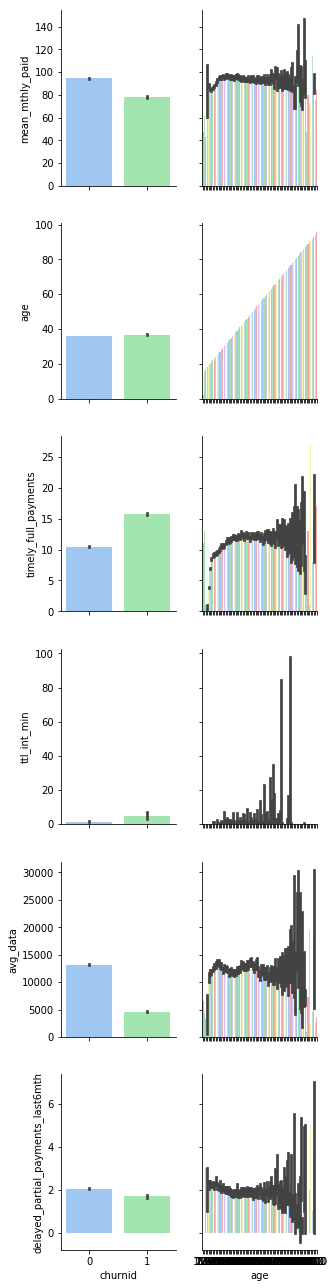

In [5]:
# TO DO: create a feature with age as bin and plot 
g = sns.PairGrid(churn,                 
                 x_vars=["churnid","age"], # ["Education","Marital", "Job"]
                 y_vars=["mean_mthly_paid", "age","timely_full_payments"
                         , "ttl_int_min","avg_data", "delayed_partial_payments_last6mth" 
                        ],
                     
                 aspect=.75,  size=3.0)
#plt.xticks(rotation=90)
g.map(sns.barplot, palette="pastel");
plt.show()

### 2.2.2 Feature Exploration

In [6]:
churn[churn.columns[0:20]].describe().round(4)

,age,locid,genid,raceid,pkgid,num_calls_cuscare,billcycle_id,mean_mthly_paid,total_bills,num_of_payments,timely_full_payments,delayed_partial_payments,total_paid_last6mth,mean_mthly_paid_last6mth,total_bills_last6mth,num_payments_last6mth,timely_full_payments_last6mth,delayed_partial_payments_last6mth
count,85748.0000,86682.0000,86682.0000,86682.0000,86682.0000,86682.0,86682.0000,86682.0000,86682.0000,86682.0000,86682.0000,86682.0000,86682.0000,86682.0000,86682.0000,86682.0000,86682.0000,86682.0000
mean,35.9329,238.6866,1.4717,1.6208,117.0150,0.0,4.9368,93.4095,17.3558,17.3558,10.8365,6.5193,509.3896,87.8919,6.1025,6.1025,4.0830,2.0195
std,11.9627,8.6190,0.4992,0.8060,102.0871,0.0,2.6386,34.5727,12.0552,12.0552,7.6934,9.2369,214.2989,37.3819,3.3388,3.3388,1.8387,3.7587
min,2.0000,231.0000,1.0000,1.0000,1.0000,0.0,1.0000,1.6100,1.0000,1.0000,0.0000,-6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-5.0000
25%,26.0000,233.0000,1.0000,1.0000,10.0000,0.0,3.0000,72.6100,9.0000,9.0000,5.0000,2.0000,402.6000,67.7500,5.0000,5.0000,3.0000,0.0000
50%,34.0000,237.0000,1.0000,1.0000,89.0000,0.0,5.0000,88.4100,15.0000,15.0000,9.0000,4.0000,485.0000,83.5000,6.0000,6.0000,4.0000,1.0000
75%,44.0000,242.0000,2.0000,2.0000,227.0000,0.0,7.0000,106.4000,23.0000,23.0000,15.0000,7.0000,573.1500,99.3300,6.0000,6.0000,6.0000,2.0000
max,96.0000,272.0000,2.0000,4.0000,300.0000,0.0,10.0000,1458.6700,671.0000,671.0000,134.0000,666.0000,12045.5000,2007.5800,156.0000,156.0000,107.0000,156.0000


In [7]:
churn[churn.columns[19:40]].describe().round(4)

,delayed_partial_payments_last6mth,ttl_data,ttl_int_sms,ttl_int_min,avg_data,avg_int_sms,avg_int_min,ttl_data_last6mth,ttl_int_sms_last6mth,ttl_int_min_last6mth,avg_data_last6mth,avg_int_sms_last6mth,avg_int_min_last6mth,avg_online_days,churnid
count,86682.0000,8.668200e+04,86682.0000,86682.0000,86682.0000,86682.0000,86682.0000,8.668200e+04,86682.0000,86682.0000,86682.0000,86682.0000,86682.0000,86682.0000,86682.0000
mean,2.0195,1.646877e+05,0.0881,1.6134,12620.2390,0.0043,0.0848,5.472992e+05,0.0165,0.2977,12026.9365,0.0028,0.0515,12.4576,0.0689
std,3.7587,1.877784e+05,4.9374,49.8447,13239.6288,0.2882,2.8815,1.173016e+06,2.1032,13.8174,13099.2676,0.3508,2.3777,1.0464,0.2533
min,-5.0000,0.000000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,11.0000,0.0000
25%,0.0000,5.099857e+04,0.0000,0.0000,4341.2525,0.0000,0.0000,2.192294e+04,0.0000,0.0000,3960.1600,0.0000,0.0000,11.6719,0.0000
50%,1.0000,1.044189e+05,0.0000,0.0000,7475.7100,0.0000,0.0000,4.196787e+04,0.0000,0.0000,7126.5250,0.0000,0.0000,12.3476,0.0000
75%,2.0000,2.025944e+05,0.0000,0.0000,16162.3175,0.0000,0.0000,3.534076e+05,0.0000,0.0000,15450.2050,0.0000,0.0000,13.0137,0.0000
max,156.0000,3.540219e+06,951.0000,5839.2200,158910.1100,73.1500,389.2800,1.712881e+07,577.0000,2275.5000,325562.7800,96.1700,379.2500,16.4998,1.0000


In [8]:
# describe categorical features
churn.describe(include=['O'])

,cust_id,cuscare_flag
count,86682,86682
unique,86682,1
top,f297e885f5833d86e5e18b53e454400c7c020e39,No
freq,1,86682


In [9]:
binary_features = list(['genid','cuscare_flag'])
categorical_features = list(['locid','raceid', 'pkgid', 'billcycle_id'])
target_col = list(['churnid'])
numerical_features = list( set(churn.columns) - set(binary_features) \
     - set(categorical_features) -set(target_col) -set(['cust_id']) )

### 2.3 Exploring Binary features

In [10]:
#import seaborn as sns
#sns.countplot(x="variable", hue="value", data=pd.melt(churn[binary_features]))
#plt.show()

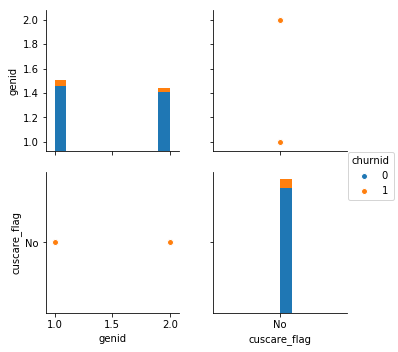

In [11]:
######### COMMENTED FOR NOW
import seaborn as sns
sns.pairplot(churn[binary_features + ['churnid']],\
                 vars = binary_features, hue = 'churnid', size = 2.5)
#sns.violinplot(data = churn[binary_features + ['churnid']],\
#                 x = list(binary_features), y = 'churnid', size = 2.5)

plt.show()

#### FINDING :  Uniform value
cuscare_flag has uniform value. Hence can be dropped

### 2.4  Exploring categorical features

In [12]:
feat = categorical_features + ['churnid']
churn[feat].sample()

#list(set(categorical_features) - set(['churnid']))

,locid,raceid,pkgid,billcycle_id,churnid
47590,231,2,227,10,0


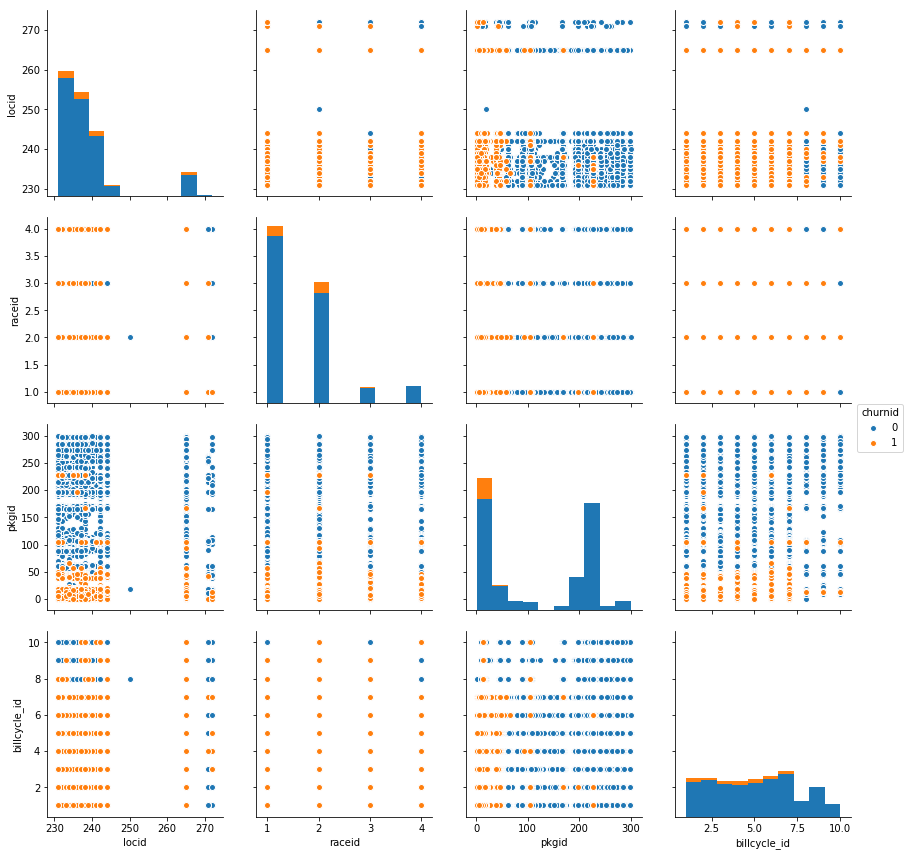

In [13]:
# Vis
sns.pairplot(churn[categorical_features + ['churnid']],\
                 vars = categorical_features, hue = 'churnid', size = 3)
plt.show()

#### 2.5 Exploring numerical features

In [14]:
#########################################
# becoz num_calls_... caused error
#num_plot_features  = list(set(numerical_features) - set(['num_calls_cuscare']))
#sns.pairplot(churn[num_plot_features + ['churnid']], vars = num_plot_features, hue = 'churnid', size = 2.5)
#plt.show()


####  2.6 Exploring Correlation

In [15]:
corr = churn.corr()

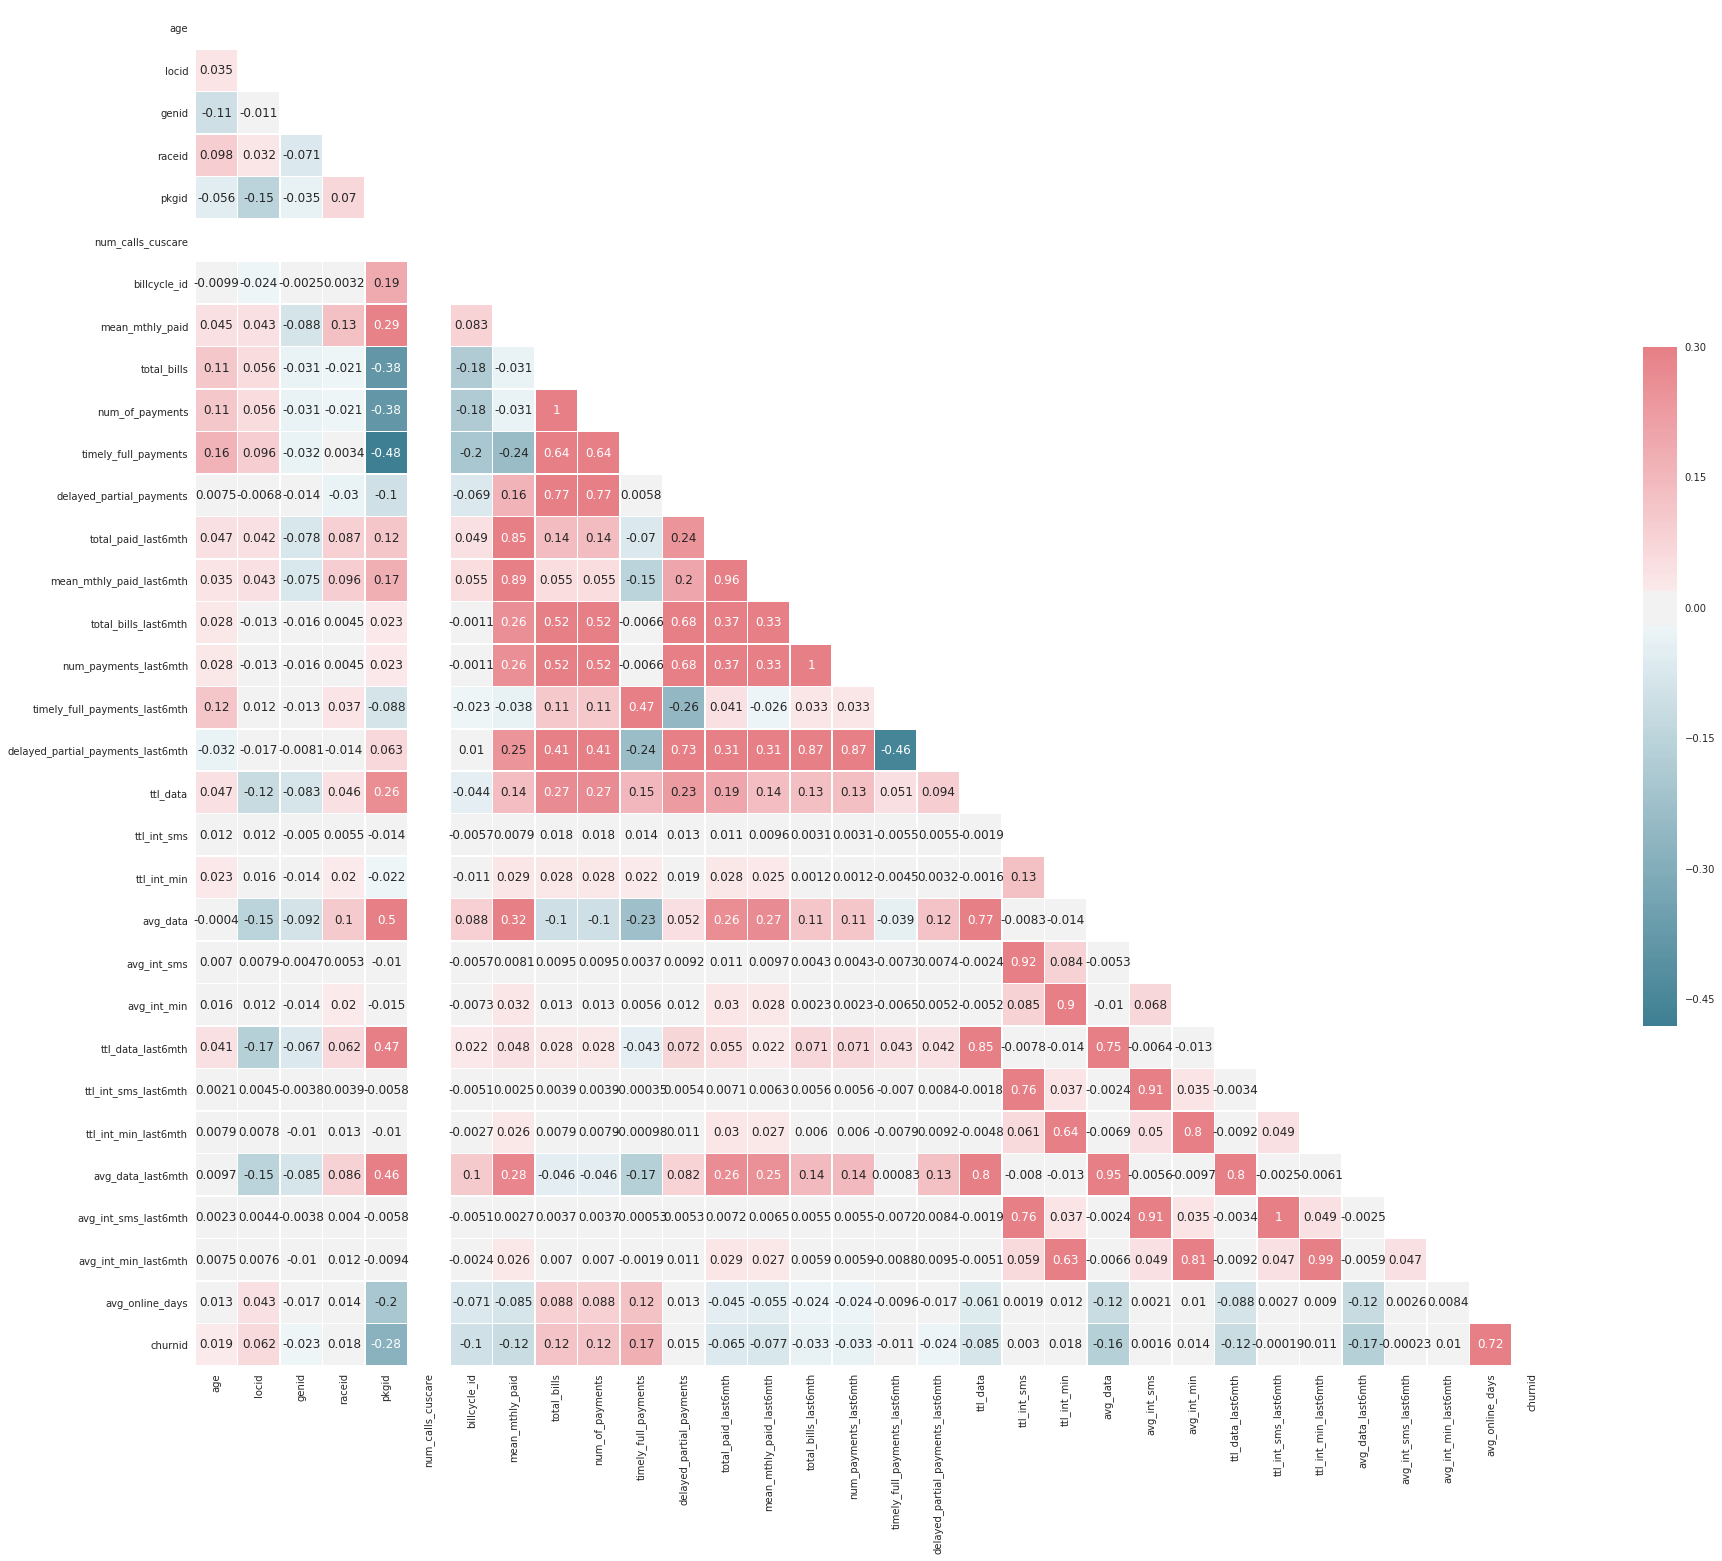

In [16]:
#Setting up correlation for our dataframe and passing it to seaborn heatmap function
#print("Double click to zoom")
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(32, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,  
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
plt.show()

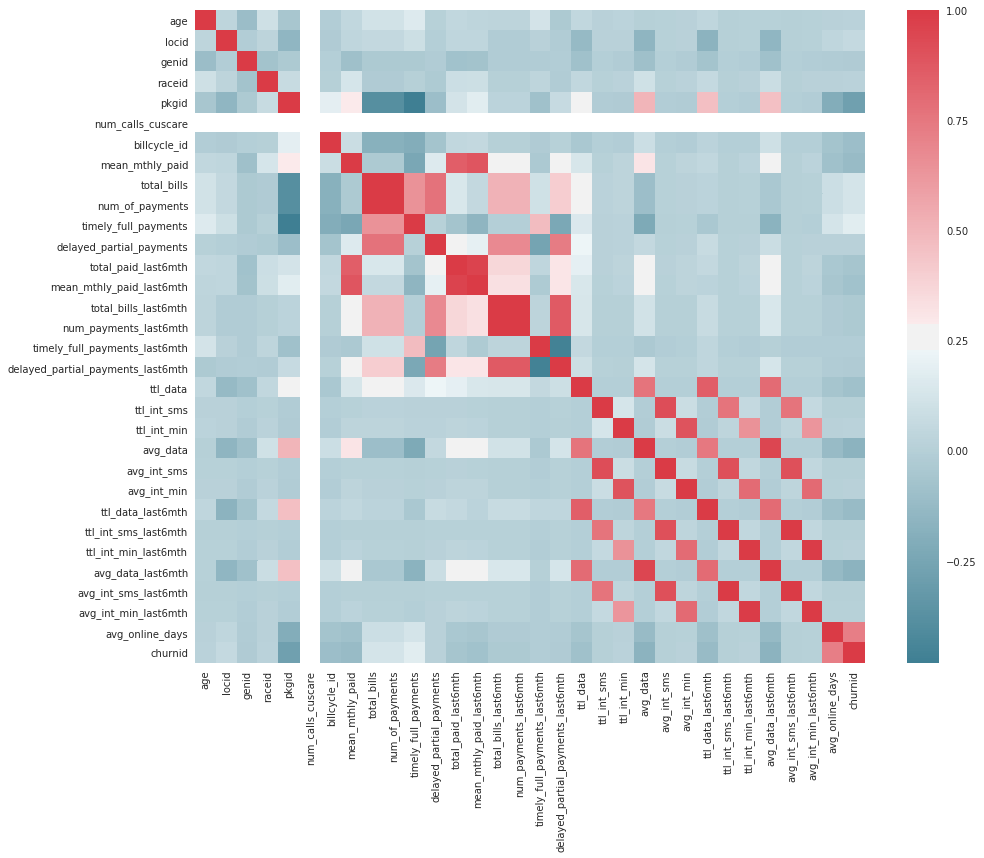

In [17]:
# Diff vis style
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap( corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            ax = ax          )
plt.show()

## Task 2 : Simple Decision Tree

Build a simple model (decision tree or regression).
Benchmark model

### 2.0 Data Preprocessing

#### 2.1 Fix Features with text values

Sklearn decision trees cannot handle features with text values. 
Requires preprocessing


In [18]:
churn = churn.drop( 'cuscare_flag', axis = 1 ).\
    drop('num_calls_cuscare', axis = 1)\
    .drop('cust_id' , axis = 1)
numerical_features =  list(set(numerical_features) - set(['cust_id','num_calls_cuscare']))

### 2.2 Missing Values

In [19]:
# Handling missing values.
# Although asked to replace values, in real world practice,
# if substitution is equivalent to shooting the mosquite with cannoon,
# then it might be best to ignore  rows or columns containing such values
print('Missing values pre fill = ' ,churn.isnull().sum().sum())
churn = churn.fillna(churn.median())
print('Missing values post fill = ' ,churn.isnull().sum().sum())



Missing values pre fill =  934
Missing values post fill =  0


### 2.1 Prepare Data for Model

Substituing Mising values with median.

In [20]:
# Create  Features and   target data
def create_X_y(df, verbose =  1):
    churn = df
    feature_cols = list(set(churn.columns) - set(['churnid']))
    target_col = 'churnid'# churn.columns[-1]

    print("Feature column(s) are :\n", feature_cols)
    print("Target column is : ", target_col)

    X_all = churn[feature_cols]
    y_all = churn[target_col]
    return X_all, y_all
    #X_all.sample(2)

X_all, y_all = create_X_y(churn)


Feature column(s) are :
 ['mean_mthly_paid_last6mth', 'avg_data_last6mth', 'total_bills_last6mth', 'ttl_int_min', 'avg_int_min_last6mth', 'ttl_int_sms', 'avg_int_sms', 'raceid', 'ttl_data_last6mth', 'avg_data', 'timely_full_payments_last6mth', 'mean_mthly_paid', 'delayed_partial_payments_last6mth', 'timely_full_payments', 'num_of_payments', 'age', 'billcycle_id', 'avg_int_min', 'ttl_int_min_last6mth', 'pkgid', 'avg_int_sms_last6mth', 'total_bills', 'delayed_partial_payments', 'ttl_int_sms_last6mth', 'genid', 'num_payments_last6mth', 'locid', 'total_paid_last6mth', 'ttl_data', 'avg_online_days']
Target column is :  churnid


### 2.1.1 Stratified Sampling Method
to be reused later as well

In [21]:
def get_stratified_data(X_df, y_series):
    from sklearn.model_selection import StratifiedShuffleSplit
    
    feature_cols = list(X_df.columns)
    #target_col = y_df.columns
    
    X = np.array(X_df)
    y = np.array(y_series)

    sss = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=4)
    sss.get_n_splits(X, y)

    for train_index, test_index in sss.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
    X_train =  pd.DataFrame(X_train, columns= feature_cols)
    X_test =  pd.DataFrame(X_test, columns= feature_cols)

    y_train =  pd.DataFrame(y_train)
    y_test =  pd.DataFrame(y_test)
    
    return X_train, y_train, X_test,  y_test

# X_trainR = X_Train Raw i.e  not preprocessed data
#X_all, y_all = create_X_y(churn)
X_trainR, y_trainR, X_testR,  y_testR  = get_stratified_data(X_all, y_all)

TRAIN: [59823 46090 71681 ... 67368 11550 10942] TEST: [74321 71396 35096 ... 82408 16730 77608]
TRAIN: [80018 68209 25532 ... 73917 59040  6079] TEST: [86024 69766 15742 ... 32420 61084 75381]


### 2.1.3 Choose Evaluation  Metric
Choosing Confusion metrics :

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Defining the confusion matrix function
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):   
    import itertools
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
                
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def eval_classification(y_test, ypred_test ):
    print('Confusion report is')
    print(classification_report(y_test, ypred_test) )    
    conf_matrix = confusion_matrix(y_test, ypred_test)
    plot_confusion_matrix(conf_matrix, classes = ['Retained', 'Churn - Lost' ], title = 'Confusion Matrix')
    return(conf_matrix)

### 2.2 Make Decision Tree Model

Confusion report is
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     24214
          1       1.00      1.00      1.00      1791

avg / total       1.00      1.00      1.00     26005



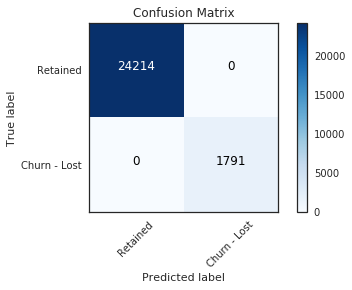

In [23]:
def simple_tree(X_trainR, y_trainR, X_testR, y_testR, \
            max_depth = None, class_weight = None):
    from sklearn import tree
    clf = tree.DecisionTreeClassifier( max_depth =   max_depth,\
                        class_weight = class_weight )
    clf.fit(X_trainR, y_trainR)
    ypred_testR = clf.predict(X_testR)

    eval_classification(y_testR, ypred_testR )
    return clf
    #import pydotplus 
    #from IPython.display import Image  
    #dot_data = tree.export_graphviz( clf, feature_names=feature_cols,out_file=None)  
    #graph = pydotplus.graph_from_dot_data(dot_data)  
    #return Image(graph.create_png())

clf = simple_tree(X_trainR, y_trainR, X_testR, y_testR )

/home/sa/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


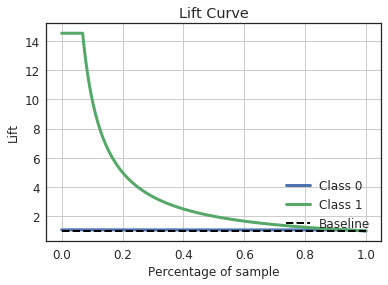

In [24]:
from sklearn import tree
import scikitplot as skplot

#clf = tree.DecisionTreeRegressor(  )
#clf.fit(X_trainR, y_trainR)

ytest_probaR = clf.predict_proba(X_testR)
skplot.metrics.plot_lift_curve(y_testR, ytest_probaR)
plt.show()

#  Removing avg_online_days & Continue
Because the avg_online_days gives perfect classification, we remove it and  continue


In [25]:
_X_trainR = X_trainR
_X_testR = X_testR
churn = churn.drop('avg_online_days', axis = 1)
numerical_features = list(set(numerical_features) - set(['avg_online_days']))



Confusion report is
             precision    recall  f1-score   support

          0       0.96      0.97      0.97     24214
          1       0.54      0.51      0.53      1791

avg / total       0.93      0.94      0.94     26005



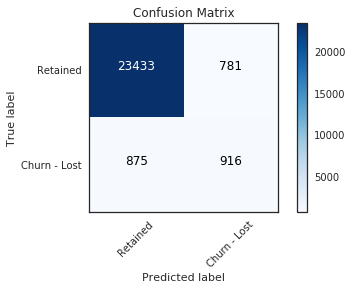

In [26]:
X_trainR = _X_trainR
X_testR = _X_testR
X_trainR = X_trainR.drop('avg_online_days', axis = 1)
X_testR = X_testR.drop('avg_online_days', axis = 1 )

clf = simple_tree(X_trainR, y_trainR, X_testR, y_testR, \
            class_weight= 'balanced')

### 2.2.1 Lift Chart

/home/sa/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


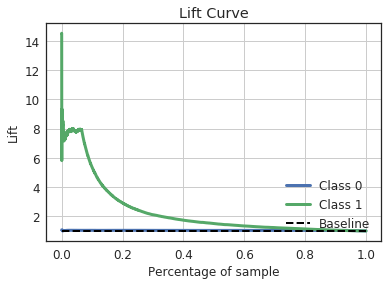

In [38]:
from sklearn import tree
import scikitplot as skplot

#clf = tree.DecisionTreeRegressor(  )
#clf.fit(X_trainR, y_trainR)

ytest_probaR = clf.predict_proba(X_testR)
skplot.metrics.plot_lift_curve(y_testR, ytest_probaR)
plt.show()

## Task 2.1 Answer : Lift chart Analysis

According to the lift chart we can see,  for the top 5 percentage of samples predicted to be a churn,  the model performs about 8 times better in those prediction.
Similarly our model performance then  exponentially drop from being 8 times better to being 2 times better for predictions on the top 5-30 % interval.
This indiates that we will get high accuracy across those intervals with high  true churn identification and low false churn prediction.
This curve can also be used  for cost-benefit  analysis.


In [39]:
def rc(X):
    print('Row x Col : [',X.shape[0],'x', X.shape[1], ']')
    
print( rc(X_trainR)  ,  rc(y_trainR), rc(X_testR), rc(y_testR) )
#simple_tree(X_trainR, y_trainR, X_testR, y_testR)

Row x Col : [ 60677 x 29 ]
Row x Col : [ 60677 x 1 ]
Row x Col : [ 26005 x 29 ]
Row x Col : [ 26005 x 1 ]
None None None None


Confusion report is
             precision    recall  f1-score   support

          0       0.96      0.97      0.97     24214
          1       0.54      0.51      0.53      1791

avg / total       0.93      0.94      0.94     26005



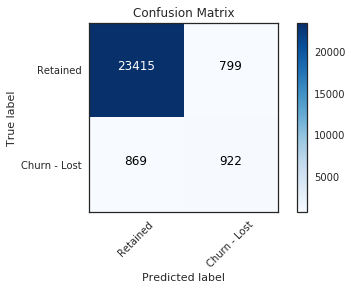

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
#churn = churn.drop('avg_online_days', axis = 1)
numerical_features = list(set(numerical_features) - set(['avg_online_days']))
#X_trainR = X_trainR.drop('avg_online_days', axis = 1)
#X_testR = X_testR.drop('avg_online_days', axis = 1 )

simple_tree(X_trainR, y_trainR, X_testR, y_testR, \
            class_weight= 'balanced')


## Task 4.0 Data PreProcessing

Perform data cleansing, transformation, imputation on the data (do not exclude records with NA rather treat them).

Unbiased Data : 
Decision tree  : Perform better but are not immune to biased class label set

### 4.0 Negative numerical Data


In [46]:
churn[numerical_features].min().sort_values()

delayed_partial_payments            -6.00
delayed_partial_payments_last6mth   -5.00
timely_full_payments_last6mth        0.00
mean_mthly_paid_last6mth             0.00
ttl_data                             0.00
total_bills_last6mth                 0.00
ttl_int_min_last6mth                 0.00
avg_int_min                          0.00
avg_data_last6mth                    0.00
avg_int_min_last6mth                 0.00
ttl_data_last6mth                    0.00
avg_int_sms_last6mth                 0.00
avg_int_sms                          0.00
num_payments_last6mth                0.00
ttl_int_sms_last6mth                 0.00
total_paid_last6mth                  0.00
ttl_int_min                          0.00
timely_full_payments                 0.00
ttl_int_sms                          0.00
avg_data                             0.00
num_of_payments                      1.00
total_bills                          1.00
mean_mthly_paid                      1.61
age                               

In [47]:
def clip_column_value_to(df, col, value, less_than = -123456789 , gt_than = 123456789 ):
    if less_than != -123456789:
        df[col][df[col] < less_than ] = value        
    if gt_than != 123456789:
        df[col][df[col] > gt_than ] = value
    return df

#  Clipping "delayed_partial_payments" & "delayed_partial_payments_last6mth" to zero
churn = clip_column_value_to(churn, 'delayed_partial_payments', 0, 0)
churn = clip_column_value_to(churn, 'delayed_partial_payments_last6mth', 0, 0)
churn[numerical_features].min().min()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.0

### 4.1 Outlier Analysis :  Preserved

Finding no. of outliers in each columns.

#### Outliers in this problem domain are signals rather than noises
Since the problem is a outlier detection problem, the outliers are then the signals instead of  noise. 

Let's say we clip the outliers to the norm, then we also  have to  remember that people not churning is the  general norm.


In [48]:
def get_outlier_count(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

get_outlier_count(churn[numerical_features])
    

mean_mthly_paid                       3458
delayed_partial_payments              8393
avg_data                              6959
delayed_partial_payments_last6mth     8495
ttl_int_sms                            603
timely_full_payments                  2323
ttl_int_min                           1167
total_paid_last6mth                   4273
ttl_int_sms_last6mth                   147
num_payments_last6mth                20270
avg_int_sms                            603
timely_full_payments_last6mth          199
num_of_payments                       2263
ttl_data_last6mth                    17192
avg_int_min_last6mth                   396
total_bills                           2263
avg_data_last6mth                     6799
avg_int_min                           1167
ttl_int_min_last6mth                   396
total_bills_last6mth                 20270
ttl_data                              6878
mean_mthly_paid_last6mth              4083
age                                    429
avg_int_sms

### 4.2  Feature Scaling

Scaling is very important for numerical linear, non-linear optimisation problems, as used by SVM, Neural Networks.

In [49]:
#_churn =  churn
#churn =  _churn
churn[numerical_features].describe()

,mean_mthly_paid,delayed_partial_payments,avg_data,delayed_partial_payments_last6mth,ttl_int_sms,timely_full_payments,ttl_int_min,total_paid_last6mth,ttl_int_sms_last6mth,num_payments_last6mth,...,avg_int_min_last6mth,total_bills,avg_data_last6mth,avg_int_min,ttl_int_min_last6mth,total_bills_last6mth,ttl_data,mean_mthly_paid_last6mth,age,avg_int_sms_last6mth
count,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,...,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,8.668200e+04,86682.000000,86682.000000,86682.000000
mean,93.409494,6.523015,12620.239000,2.029683,0.088081,10.836494,1.613422,509.389598,0.016532,6.102490,...,0.051516,17.355795,12026.936463,0.084840,0.297710,6.102490,1.646877e+05,87.891895,35.912046,0.002810
std,34.572663,9.233928,13239.628756,3.750666,4.937379,7.693430,49.844719,214.298926,2.103239,3.338844,...,2.377736,12.055177,13099.267643,2.881531,13.817447,3.338844,1.877784e+05,37.381921,11.899783,0.350798
min,1.610000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000
25%,72.610000,2.000000,4341.252500,0.000000,0.000000,5.000000,0.000000,402.600000,0.000000,5.000000,...,0.000000,9.000000,3960.160000,0.000000,0.000000,5.000000,5.099857e+04,67.750000,26.000000,0.000000
50%,88.410000,4.000000,7475.710000,1.000000,0.000000,9.000000,0.000000,485.000000,0.000000,6.000000,...,0.000000,15.000000,7126.525000,0.000000,0.000000,6.000000,1.044189e+05,83.500000,34.000000,0.000000
75%,106.400000,7.000000,16162.317500,2.000000,0.000000,15.000000,0.000000,573.150000,0.000000,6.000000,...,0.000000,23.000000,15450.205000,0.000000,0.000000,6.000000,2.025944e+05,99.330000,44.000000,0.000000
max,1458.670000,666.000000,158910.110000,156.000000,951.000000,134.000000,5839.220000,12045.500000,577.000000,156.000000,...,379.250000,671.000000,325562.780000,389.280000,2275.500000,156.000000,3.540219e+06,2007.580000,96.000000,96.170000


In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(churn[numerical_features])

churn[numerical_features] = scaler.transform(churn[numerical_features])
churn.describe()

,age,locid,genid,raceid,pkgid,billcycle_id,mean_mthly_paid,total_bills,num_of_payments,timely_full_payments,...,avg_data,avg_int_sms,avg_int_min,ttl_data_last6mth,ttl_int_sms_last6mth,ttl_int_min_last6mth,avg_data_last6mth,avg_int_sms_last6mth,avg_int_min_last6mth,churnid
count,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,...,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000
mean,0.360766,238.686555,1.471747,1.620775,117.015032,4.936769,0.063003,0.024412,0.024412,0.080869,...,0.079417,0.000058,0.000218,0.031952,0.000029,0.000131,0.036942,0.000029,0.000136,0.068884
std,0.126593,8.619000,0.499204,0.806007,102.087051,2.638581,0.023728,0.017993,0.017993,0.057414,...,0.083315,0.003941,0.007402,0.068482,0.003645,0.006072,0.040236,0.003648,0.006270,0.253258
min,0.000000,231.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.255319,233.000000,1.000000,1.000000,10.000000,3.000000,0.048728,0.011940,0.011940,0.037313,...,0.027319,0.000000,0.000000,0.001280,0.000000,0.000000,0.012164,0.000000,0.000000,0.000000
50%,0.340426,237.000000,1.000000,1.000000,89.000000,5.000000,0.059572,0.020896,0.020896,0.067164,...,0.047044,0.000000,0.000000,0.002450,0.000000,0.000000,0.021890,0.000000,0.000000,0.000000
75%,0.446809,242.000000,2.000000,2.000000,227.000000,7.000000,0.071919,0.032836,0.032836,0.111940,...,0.101707,0.000000,0.000000,0.020632,0.000000,0.000000,0.047457,0.000000,0.000000,0.000000
max,1.000000,272.000000,2.000000,4.000000,300.000000,10.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4.3 Uniform Feature Values

Based on exploratory analysis

In [52]:
#churn = churn.drop( 'cuscare_flag', axis = 1 ).
#churn = churn.drop('num_calls_cuscare', axis = 1)

In [53]:
#churn['cuscare_flag'].sample()

### 4.4 Categorical variables Transformation
One hot Encoding

In [54]:
churn = pd.get_dummies(churn, columns = ['locid', 'raceid','pkgid','billcycle_id'])
churn.sample()

,age,genid,mean_mthly_paid,total_bills,num_of_payments,timely_full_payments,delayed_partial_payments,total_paid_last6mth,mean_mthly_paid_last6mth,total_bills_last6mth,...,billcycle_id_1,billcycle_id_2,billcycle_id_3,billcycle_id_4,billcycle_id_5,billcycle_id_6,billcycle_id_7,billcycle_id_8,billcycle_id_9,billcycle_id_10
6230,0.223404,1,0.058412,0.025373,0.025373,0.104478,0.006006,0.048753,0.048755,0.044872,...,0,0,0,0,0,1,0,0,0,0


### 4.5 Binary Variables Transformation

Fix identified based on exploratory analysis

Fix genid. Cuscare_flag fix not done because already removed

In [55]:
churn['genid'][churn['genid'] == 2] = 0
churn.sample()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,age,genid,mean_mthly_paid,total_bills,num_of_payments,timely_full_payments,delayed_partial_payments,total_paid_last6mth,mean_mthly_paid_last6mth,total_bills_last6mth,...,billcycle_id_1,billcycle_id_2,billcycle_id_3,billcycle_id_4,billcycle_id_5,billcycle_id_6,billcycle_id_7,billcycle_id_8,billcycle_id_9,billcycle_id_10
23511,0.478723,1,0.053979,0.01791,0.01791,0.08209,0.003003,0.04185,0.041851,0.038462,...,0,0,0,0,0,0,1,0,0,0


### 4.6 Data skew Transformation
To Do


### 4.7 Correlation 

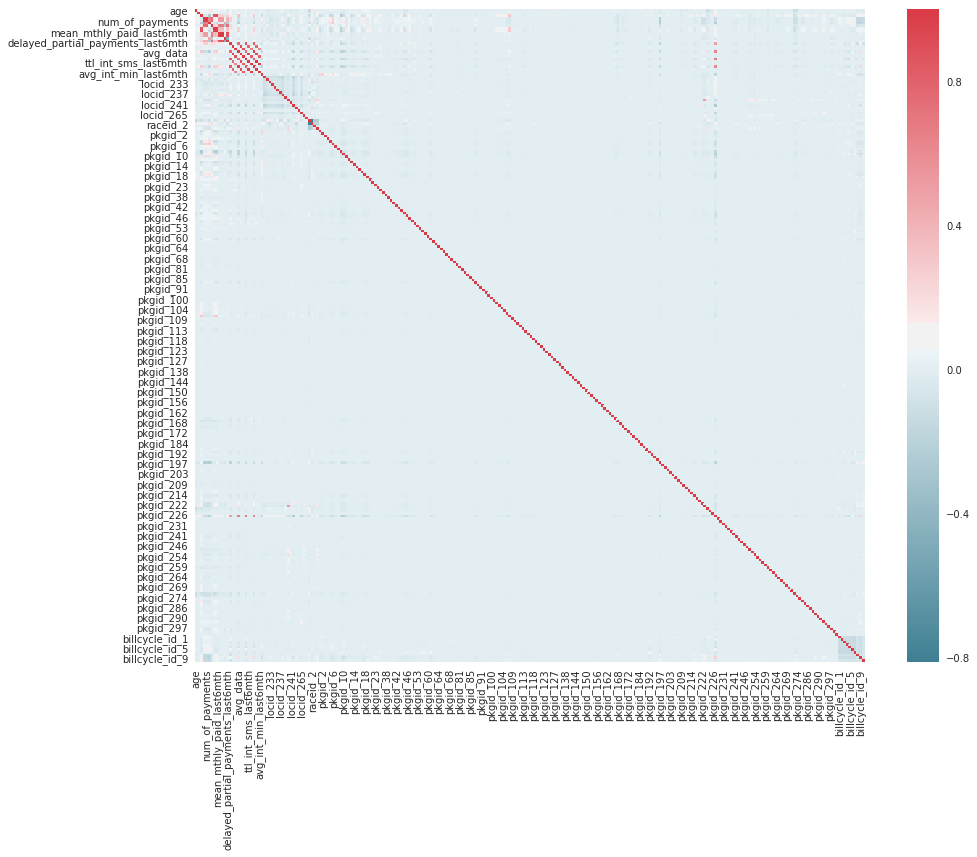

In [56]:
churn_corr = churn.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap( churn_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            ax = ax          )
plt.show()

#### 4.7.1 Using PCA to remove correlation

In [57]:
X_all, y_all = create_X_y(churn)

Feature column(s) are :
 ['pkgid_172', 'pkgid_213', 'pkgid_157', 'pkgid_14', 'pkgid_297', 'pkgid_222', 'pkgid_210', 'avg_int_min_last6mth', 'pkgid_233', 'pkgid_15', 'pkgid_39', 'pkgid_174', 'pkgid_3', 'ttl_data', 'pkgid_111', 'pkgid_85', 'pkgid_198', 'billcycle_id_2', 'pkgid_226', 'pkgid_93', 'pkgid_242', 'pkgid_103', 'pkgid_80', 'pkgid_293', 'pkgid_38', 'pkgid_112', 'pkgid_145', 'pkgid_298', 'pkgid_288', 'pkgid_10', 'pkgid_83', 'pkgid_199', 'pkgid_62', 'total_paid_last6mth', 'pkgid_7', 'locid_236', 'pkgid_185', 'raceid_1', 'pkgid_147', 'pkgid_196', 'pkgid_209', 'pkgid_184', 'pkgid_207', 'pkgid_255', 'pkgid_64', 'total_bills_last6mth', 'pkgid_254', 'pkgid_57', 'pkgid_48', 'pkgid_23', 'pkgid_109', 'billcycle_id_5', 'pkgid_261', 'pkgid_166', 'pkgid_202', 'pkgid_142', 'pkgid_16', 'pkgid_107', 'pkgid_45', 'ttl_int_min', 'pkgid_89', 'pkgid_110', 'pkgid_144', 'pkgid_123', 'pkgid_153', 'pkgid_165', 'num_payments_last6mth', 'pkgid_59', 'pkgid_203', 'pkgid_12', 'pkgid_28', 'pkgid_287', 'pkgid_2

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 80)
pca.fit(X_all)
X_all_pca = pca.transform(X_all)

print('Number of Columns =', X_all.shape[1], '. Now Reduced to = 80')
print('Total variance explained by pca 80 component', pca.explained_variance_ratio_.sum() )
print('Explained variance ratio by pca components = ', pca.explained_variance_ratio_)

Total variance explained by pca 80 component 0.9903858550249993
Explained variance ratio by pca components =  [0.12637232 0.07616978 0.06627675 0.04347914 0.03807395 0.03706284
 0.03405366 0.03327212 0.03260919 0.03210157 0.03124278 0.03048841
 0.02875028 0.02617621 0.0242268  0.02411155 0.02176876 0.02065705
 0.01758135 0.01648836 0.01549517 0.01491033 0.01402041 0.01359437
 0.0115692  0.01128966 0.01081189 0.01000681 0.00960899 0.00898154
 0.00803507 0.00762903 0.00670486 0.00584015 0.00545446 0.00512453
 0.00459128 0.00423827 0.00361605 0.00339279 0.00316623 0.00304223
 0.00301962 0.00284679 0.00263233 0.00260124 0.00249178 0.00240699
 0.00229895 0.00226322 0.00218905 0.00182954 0.00166471 0.00162671
 0.001572   0.00151977 0.00134948 0.00123217 0.00117775 0.00106689
 0.00097101 0.00091294 0.00086858 0.00076802 0.00071313 0.00069994
 0.00069384 0.00067578 0.00063761 0.00060758 0.00059043 0.00056226
 0.00051553 0.00050201 0.0004988  0.00047654 0.00047039 0.0004606
 0.00045135 0.000434

#### 4.7.1.1 PCA components vs variance tradeoff Chart

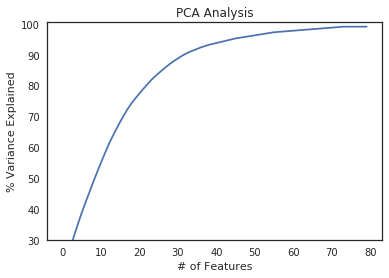

In [60]:
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)
plt.show()

In [61]:
# Select 80 pca features
#pca = PCA(n_components=80)
#pca.fit(X_all)
#print('variance explained', pca.explained_variance_ratio_.sum())
#X_all_pca = pca.transform(X_all)

variance explained 0.990394465225592


In [62]:
pd.DataFrame(X_all_pca).sample(2)

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
82761,0.842539,-0.136703,-0.586968,0.005846,-0.000132,-0.340091,-0.039496,0.038022,0.476166,0.020866,...,0.013534,-0.020462,0.011670,-0.011833,-0.012850,-0.004347,0.002179,-0.002320,0.005070,0.007913
48859,0.759600,-0.393277,-0.847723,-0.203993,-0.358243,0.270662,0.009099,-0.170195,-0.161664,0.712414,...,-0.030286,0.007020,-0.016369,0.017547,0.006605,0.004253,-0.001430,0.002176,-0.000498,-0.005718


### 4.8  Fixing -biased Data

churn : SMOTE : synthetic oversampling for class 1

In [63]:
X_train, y_train, X_test,  y_test  = get_stratified_data(X_all, y_all)
print('[0class 1class] =  ',np.bincount(y_train[0]))

TRAIN: [59823 46090 71681 ... 67368 11550 10942] TEST: [74321 71396 35096 ... 82408 16730 77608]
TRAIN: [80018 68209 25532 ... 73917 59040  6079] TEST: [86024 69766 15742 ... 32420 61084 75381]
[0class 1class] =   [56497  4180]


In [75]:
import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE (random_state = 4, ratio = 1)
X_train, y_train = sm.fit_sample(X_train, y_train)

print('[0class 1class] =  ',np.bincount(y_train))

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


[0class 1class] =   [58401 58401]


Confusion report is
             precision    recall  f1-score   support

          0       0.97      0.95      0.96     24214
          1       0.46      0.58      0.51      1791

avg / total       0.93      0.92      0.93     26005



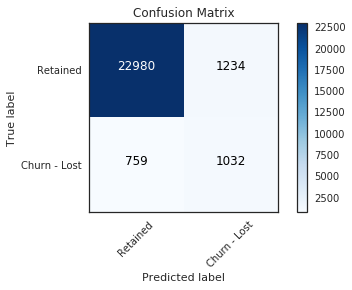

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
# tested data preprocessing against earlier simple tree
simple_tree(X_train, y_train, X_test, y_test, class_weight= 'balanced')

## TASK 5 : Build Complex model

Build second version of the model using advanced machine learning algorithms (random forest, neural network, deep learning, etc.) and evaluate it to compare the performance gain.
	 

## 5.1 Random Forest Classifier

Confusion report is
             precision    recall  f1-score   support

          0       0.97      0.96      0.96     24214
          1       0.52      0.66      0.58      1791

avg / total       0.94      0.94      0.94     26005



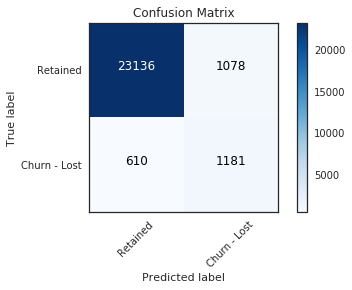

array([[23136,  1078],
       [  610,  1181]])

In [66]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 50, max_depth = 20  )
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

#eval_classification( y_train,  clf.predict(X_train) )
eval_classification( y_test,  y_pred_test )

#### Complex Random Forest : Performs slightly better to prev simple tree.

Confusion report is
             precision    recall  f1-score   support

          0       0.97      0.95      0.96     24214
          1       0.45      0.58      0.51      1791

avg / total       0.93      0.92      0.93     26005



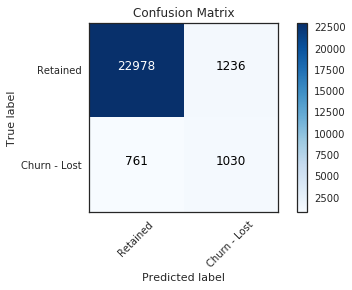

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [67]:
# Tree post Data Preprocessing
simple_tree(X_train, y_train, X_test, y_test, class_weight= 'balanced')
#eval_classification( y_test,  y_pred_test )

## 5.2 Neural Network Classifier


Confusion report is
             precision    recall  f1-score   support

          0       0.96      0.97      0.97     23486
          1       0.70      0.63      0.66      2519

avg / total       0.93      0.94      0.94     26005



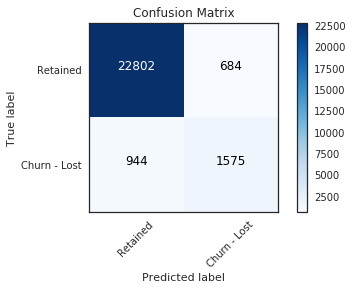

array([[22802,   684],
       [  944,  1575]])

In [68]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(200, ), activation = 'relu',\
                  solver = 'adam', max_iter = 100000, tol = 0.001,\
                  shuffle = True )
nn_model = nn.fit(X_train, y_train)
y_test = nn_model.predict(X_test)

eval_classification( y_test,  y_pred_test )

### CONCLUSION : Performance Gain from tree to Neural Network

Simple Tree (Confusion Matrix)
        
     [23430   784]
     [  874   917]

Neural Network

     [22768   720]
     [  997  1520]


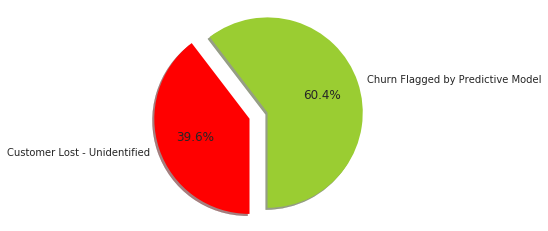

In [69]:
labels =  'Churn Flagged by Predictive Model', 'Customer Lost - Unidentified'
sizes = [ 1520, 997  ] #(assuming 50 % retention for targeted indv.)
colors = [ 'yellowgreen' , 'red']
explode = (0.2, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle= 270 )
 
plt.axis('equal')
plt.show()

## 6.0 Future :
Based on available time, prioritize which steps would you further take to best
		optimize your model and then perform few of the most important steps to optimize 
		the model. If you do not have sufficient time to cover this step, 
		please provide a note on which steps would you take and 
		why, what method would you use for performing the task, 
		and what is your expected outcome after performing those steps.
		- Data Skewness fix - Improved performance.
	  	- NN with regularisation : Ensure model is  not overfitting
		- Try multiple layer neural network models  - Increased performance